<a href="https://colab.research.google.com/github/Erajjamil137/Data-preprocessing/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # For handling arrays and numeric operations
from sklearn.cluster import DBSCAN  # For DBSCAN clustering
import matplotlib.pyplot as plt  # For visualizing clusters and outliers
from sklearn.datasets import make_blobs  # To create sample data


In [2]:
# Step 1: Generate Sample Data

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Generating outliers
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))

# Combine the cluster data and outliers into a single dataset
X = np.vstack([X, outliers])

# Confirm data shape
print("Data shape:", X.shape)


Data shape: (320, 2)


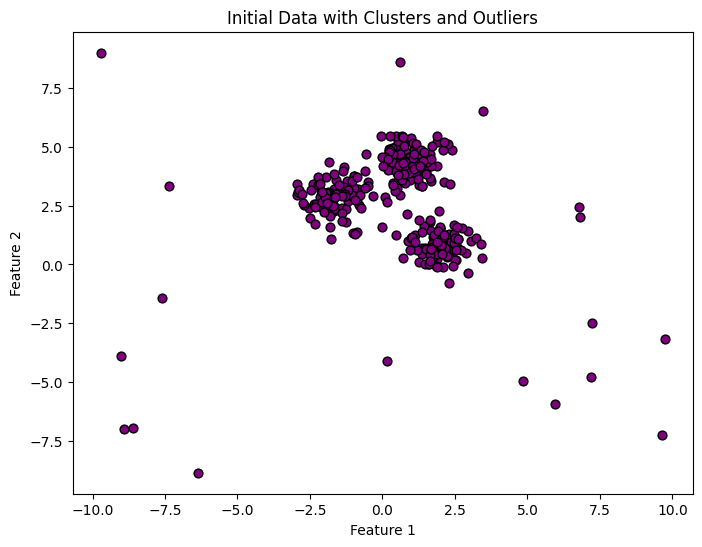

In [4]:
# Step 2: Visualizing Initial Data Distribution
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='purple', marker='o', edgecolor='k', s=40)
plt.title("Initial Data with Clusters and Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
# Step 3: Define DBSCAN Parameters
eps_value = 0.8
min_samples_value = 5

In [7]:
# Step 4: Initialize and Fit the DBSCAN Model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X)  # Fit and predict cluster labels in one step

In [8]:
# Step 5: Analyze DBSCAN Output
unique_labels = set(labels)
print("Unique labels (clusters and noise):", unique_labels)

Unique labels (clusters and noise): {0, 1, -1}


In [10]:
# Step 6: Visualize DBSCAN Results
# Set colors for each cluster, including black for outliers.
plt.figure(figsize=(10, 8))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black color for noise/outliers
        color = [0, 0, 0, 1]

    # Boolean mask for points in the current cluster or noise
    class_members = (labels == label)
    xy = X[class_members]

<Figure size 1000x800 with 0 Axes>

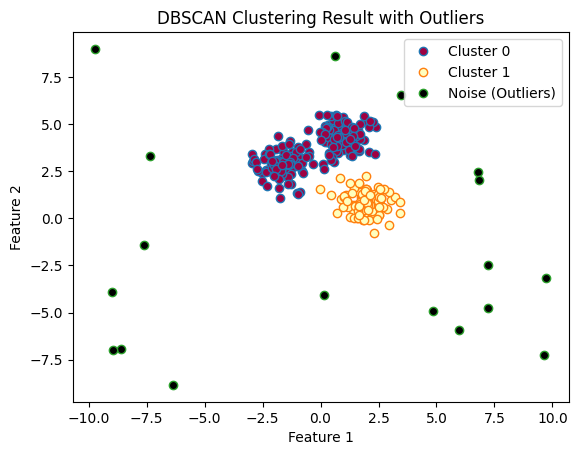

In [15]:
# Plot each cluster (or noise) with different colors
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black color for noise/outliers
        color = [0, 0, 0, 1]

    # Boolean mask for points in the current cluster or noise
    class_members = (labels == label)
    xy = X[class_members]

    # Check if xy is not empty before plotting
    if len(xy) > 0:
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color), markersize=6,
                 label=f"Cluster {label}" if label != -1 else "Noise (Outliers)")

plt.title("DBSCAN Clustering Result with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [17]:
 #Step 7: Interpretation of DBSCAN Results
# Summarizing the number of points in each cluster (including outliers)
from collections import Counter
print("Data points per cluster:", Counter(labels))

# Further analysis to determine the density of each cluster
for label in unique_labels:
    if label != -1:  # Skiping outliers
        num_points_in_cluster = sum(labels == label)
        print(f"Cluster {label} has {num_points_in_cluster} points.")
    else:
        print(f"Outliers (Noise) detected: {sum(labels == -1)} points")

Data points per cluster: Counter({0: 201, 1: 101, -1: 18})
Cluster 0 has 201 points.
Cluster 1 has 101 points.
Outliers (Noise) detected: 18 points
